# Brasileirão - 2006 a 2025
>Análises estatísticas dos campeonatos brasileiros na era dos pontos corridos, com 20 times e 38 rodadas.

# EDA

# Import

In [17]:
import time
import random
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plot
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import root_mean_squared_error as rmse

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

In [19]:
df = pd.read_parquet('../dados/df_completo.parquet')
df


,ano_campeonato,rodada,time,adversário,gols_pro,gols_contra,pontos,vitoria,derrota,empate,pontos_acum,vitorias_acum,empates_acum,derrotas_acum,gols_pro_acum,gols_contra_acum,saldo_gols_acum,classificacao_1o_turno,classificacao_final
0,2006,1,Atlético-PR,Fluminense,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,-1.0,14,13
1,2006,2,Atlético-PR,Santos,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,-3.0,14,13
2,2006,3,Atlético-PR,Botafogo,4.0,0.0,3.0,1.0,0.0,0.0,3.0,1.0,0.0,2.0,5.0,4.0,1.0,14,13
3,2006,4,Atlético-PR,Internacional,1.0,2.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,3.0,6.0,6.0,0.0,14,13
4,2006,5,Atlético-PR,Santa Cruz,2.0,1.0,3.0,1.0,0.0,0.0,6.0,2.0,0.0,3.0,8.0,7.0,1.0,14,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15195,2025,34,Vasco da Gama,Grêmio,0.0,2.0,0.0,0.0,1.0,0.0,42.0,12.0,6.0,16.0,50.0,51.0,-1.0,16,14
15196,2025,35,Vasco da Gama,EC Bahia,0.0,0.0,1.0,0.0,0.0,1.0,43.0,12.0,7.0,16.0,50.0,51.0,-1.0,16,14
15197,2025,36,Vasco da Gama,Internacional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,14
15198,2025,37,Vasco da Gama,Mirassol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,14


# EDA
>Análise Exploratória de Dados

In [20]:
#Comparativo entre todos os times por temporada
filtro_ano = 2025
filtro_time = 'Corinthians'
plt.figure(figsize = (20,7))
df_ano = df_cumsum.loc[df_cumsum.ano_campeonato == filtro_ano]
fig = px.line(df_ano, x ='rodada', y = 'pontos_acum', color = 'time', title = f'Brasileirão {filtro_ano}')
fig.add_vline(x=19, line_width=3, line_dash="dash", line_color="green")

c:\Users\M4005001\AppData\Local\Programs\Python\virtual_envs\brasileirao\Lib\site-packages\plotly\express\_core.py:1992: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


<Figure size 2000x700 with 0 Axes>

## Evolução por rodada

In [21]:
#Comparativo entre todos os times por temporada
filtro_ano1 = 2024
filtro_ano2 = 2025

plt.figure(figsize = (20,7))
df_ano = df_cumsum.loc[(df_cumsum.ano_campeonato == filtro_ano1) | (df_cumsum.ano_campeonato == filtro_ano2) ]
fig = px.line(df_ano, x ='rodada', y = 'pontos_acum', color = 'time', facet_col= 'ano_campeonato', title = f'Brasileirão | Comparativo')
fig.add_vline(x=19, line_width=3, line_dash="dash", line_color="green")

<Figure size 2000x700 with 0 Axes>

In [22]:
#Comparativo entre os campeões do 1o. turno desde 2006
plt.figure(figsize = (20,7))
df_plot = df_completo.loc[(df_completo.classificacao_1o_turno == 1) ]
fig = px.line(df_plot, x ='rodada', y = 'pontos_acum', color = 'ano_campeonato', title = f'Campeões do 1o. Turno dos Brasileirões', hover_name='time', hover_data=['classificacao_1o_turno', 'classificacao_final'])
fig.add_vline(x=19, line_width=3, line_dash="dash", line_color="green")

c:\Users\M4005001\AppData\Local\Programs\Python\virtual_envs\brasileirao\Lib\site-packages\plotly\express\_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<Figure size 2000x700 with 0 Axes>

In [23]:
#Comparativo entre os campeões desde 2006
plt.figure(figsize = (20,7))
df_plot = df_completo.loc[(df_completo.classificacao_final == 1) ]
fig = px.line(df_plot, x ='rodada', y = 'pontos_acum', color = 'ano_campeonato', title = f'Campeões dos Brasileirões', hover_name='time')
fig.add_vline(x=19, line_width=3, line_dash="dash", line_color="green")

c:\Users\M4005001\AppData\Local\Programs\Python\virtual_envs\brasileirao\Lib\site-packages\plotly\express\_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<Figure size 2000x700 with 0 Axes>

In [25]:
# Create distplot with curve_type set to 'normal'
group_labels = []
hist_data = []

for ano in df_rodada38.dropna().ano_campeonato.unique():
  group_labels.append(str(ano))
  df_ano = df_rodada38.loc[df_rodada38.ano_campeonato == ano]['pontos_acum'].tolist()
  hist_data.append(df_ano)
fig = ff.create_distplot(hist_data, group_labels, curve_type = 'normal', show_hist=False, show_rug = False)

# Add title
fig.update_layout(title_text='Distribuição dos pontos dos 20 times na 38a rodada')
fig.show()

In [26]:
# Desvio padrão entre os pontos dos 20 times na ultima rodada (#38)
df_completo.groupby('ano_campeonato').pontos_acum.std()

ano_campeonato
2006    16.548237
2007    16.787801
2008    16.782919
2009    16.360315
2010    16.269261
2011    16.560927
2012    17.300102
2013    16.666530
2014    16.993274
2015    17.018150
2016    16.984054
2017    16.373840
2018    16.962331
2019    17.936313
2020    16.814262
2021    17.029766
2022    16.913201
2023    17.067857
2024    17.268212
2025    15.869003
Name: pontos_acum, dtype: float64

In [27]:
#Pontos dos campeões de cada ano
df_rodada38.groupby('ano_campeonato').pontos_acum.max()

ano_campeonato
2006    78.0
2007    77.0
2008    75.0
2009    67.0
2010    71.0
2011    71.0
2012    77.0
2013    76.0
2014    80.0
2015    81.0
2016    80.0
2017    72.0
2018    80.0
2019    90.0
2020    71.0
2021    84.0
2022    81.0
2023    70.0
2024    79.0
2025    71.0
Name: pontos_acum, dtype: float64

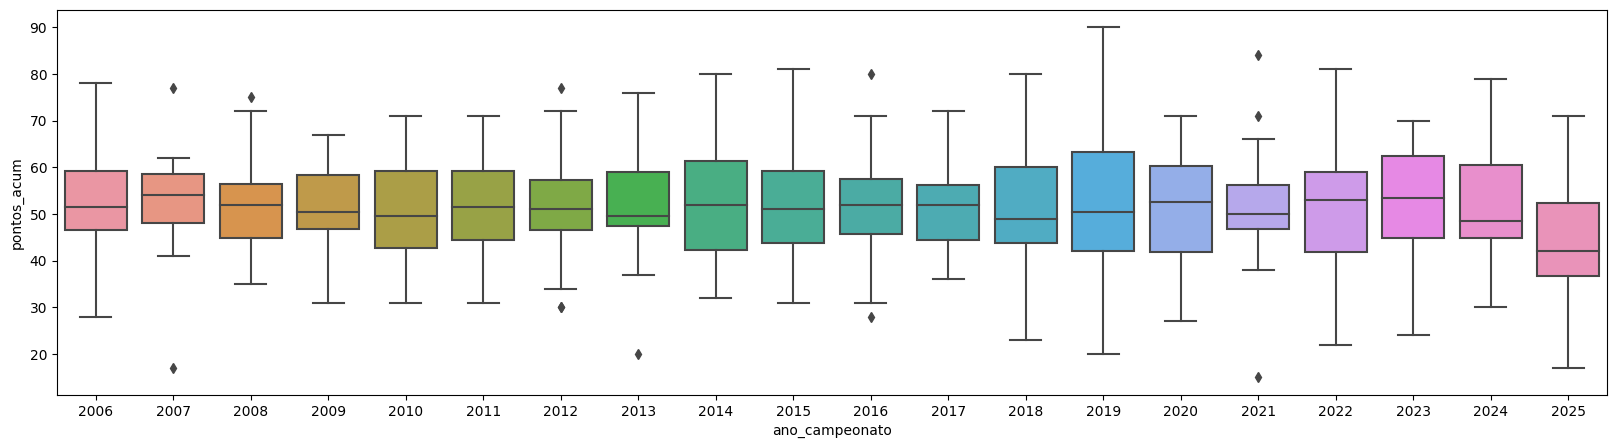

In [28]:
# Boxplot da distribuição dos pontos na última rodada entre os 20 times
plt.figure(figsize = (20,5))
sns.boxplot(data = df_rodada38, x = 'ano_campeonato', y = 'pontos_acum');

In [29]:
#Comparativo entre todos os times por temporada
filtro_ano1 = 2024
filtro_ano2 = 2025
select_top = 6
select_last = 4

plt.figure(figsize = (20,7))
df_plot = df_completo.loc[((df_completo.ano_campeonato == filtro_ano1) | (df_completo.ano_campeonato == filtro_ano2)) & ((df_completo.classificacao_final <= select_top) | (df_completo.classificacao_final > 20 - select_top)) ]
fig = px.line(df_plot, x ='rodada', y = 'pontos_acum', color = 'time', facet_col= 'ano_campeonato', title = f'Brasileirão {filtro_ano}', hover_data=['classificacao_final'])
fig.add_vline(x=19, line_width=3, line_dash="dash", line_color="green")

<Figure size 2000x700 with 0 Axes>

# Relação entre campeões do 1o Turno e Campeões Final

### Classificação Final dos Times "Campeões" do 1o Turno

In [30]:
#classificação turno1 para classificação final
df_plot = df_completo.groupby(['ano_campeonato','time'])[['classificacao_1o_turno','classificacao_final']].max().reset_index()
df_plot = df_plot.groupby(['classificacao_1o_turno','classificacao_final'])['time'].count().reset_index()
df_plot = df_plot.loc[df_plot.classificacao_1o_turno == 1]

display(df_plot)

#data
label = ['Turno1_1o',   #0

        'Final_1o.',    #1
        'Final_2o.',    #2
        'Final_3o.',    #3
        'Final_4o.',    #4
        'Final_5o.']    #5

source = [0,0,0,0]
target = [1,2,4,5]
value = df_plot.time.tolist()

#data to dict, dict to sankey
link = dict(source = source, target = target, value = value)
node = dict(label = label, pad = 35, thickness = 10)
data = go.Sankey(link = link, node = node, orientation = 'h')

fig = go.Figure(data)
fig.update_layout(
    hovermode = 'x',
    title = 'Classificação Final dos Times "Campeões" do 1o Turno',
    font = dict(size = 10, color = 'white'),
    paper_bgcolor = '#51504f'
)
fig.show()

,classificacao_1o_turno,classificacao_final,time
0,1,1,14
1,1,2,3
2,1,4,1
3,1,5,2


### Classificação no 1o Turno dos Times Campeões

In [31]:
#classificação turno1 para campeões
df_plot = df_completo.groupby(['ano_campeonato','time'])[['classificacao_1o_turno','classificacao_final']].max().reset_index()
df_plot = df_plot.groupby(['classificacao_final','classificacao_1o_turno'])['time'].count().reset_index()
df_plot = df_plot.loc[df_plot.classificacao_final == 1]

display(df_plot)

#data
label = ['Campeões',   #0

        'Turno1_1o.',    #1
        'Turno1_2o.',    #2
        'Turno1_3o.',    #3
        'Turno1_4o.',    #4
        'Turno1_5o.',    #5
        'Turno1_6o.',    #6
        'Turno1_7o.',    #7
        'Turno1_8o.',    #8
        'Turno1_9o.',    #9
        'Turno1_10o.']   #10

target = [0,0,0,0,0,0]
source = [1,2,3,4,6,10]
value = df_plot.time.tolist()

#data to dict, dict to sankey
link = dict(source = source, target = target, value = value)
node = dict(label = label, pad = 35, thickness = 10)
data = go.Sankey(link = link, node = node, orientation = 'h')

fig = go.Figure(data)
fig.update_layout(
    hovermode = 'x',
    title = 'Classificação no 1o Turno dos Times Campeões',
    font = dict(size = 10, color = 'white'),
    paper_bgcolor = '#51504f'
)
fig.show()

,classificacao_final,classificacao_1o_turno,time
0,1,1,14
1,1,2,1
2,1,3,2
3,1,4,1
4,1,6,1
5,1,10,1


# Similaridade de Cosseno

## Curva da posição 1 de cada ano_campeonato

In [32]:
df_pos1 = df_completo.groupby(['ano_campeonato','rodada'])['pontos_acum'].max().reset_index()
df_pos1 = df_pos1.pivot(index='rodada', columns='ano_campeonato', values='pontos_acum').reset_index()
df_pos1.index.name = None
display(df_pos1)

plt.figure(figsize = (20,7))
fig = px.line(df_pos1, x ='rodada', y = df_pos1.iloc[:,1:].columns, title = f'Brasileirão 2006 - 2024 | Pontos do 1o. colocado a cada rodada')
fig.add_vline(x=19, line_width=3, line_dash="dash", line_color="green")
fig.show()

ano_campeonato,rodada,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,2,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0
2,3,7.0,9.0,9.0,9.0,9.0,9.0,9.0,7.0,7.0,7.0,7.0,7.0,7.0,9.0,9.0,9.0,7.0,9.0,7.0,7.0
3,4,10.0,10.0,10.0,12.0,10.0,12.0,12.0,8.0,10.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,12.0,9.0,10.0
4,5,13.0,11.0,13.0,13.0,13.0,15.0,13.0,11.0,11.0,12.0,13.0,13.0,10.0,13.0,12.0,13.0,12.0,15.0,10.0,13.0
5,6,13.0,14.0,13.0,14.0,16.0,15.0,14.0,13.0,13.0,15.0,13.0,16.0,13.0,16.0,15.0,14.0,13.0,15.0,13.0,14.0
6,7,16.0,15.0,16.0,17.0,17.0,17.0,16.0,15.0,16.0,16.0,16.0,19.0,14.0,19.0,16.0,17.0,14.0,18.0,14.0,16.0
7,8,19.0,17.0,19.0,17.0,18.0,20.0,19.0,16.0,16.0,18.0,19.0,20.0,17.0,22.0,17.0,18.0,15.0,21.0,17.0,19.0
8,9,19.0,18.0,22.0,20.0,21.0,23.0,22.0,18.0,19.0,19.0,19.0,23.0,20.0,25.0,20.0,21.0,18.0,21.0,19.0,22.0
9,10,21.0,21.0,23.0,21.0,22.0,26.0,25.0,20.0,22.0,22.0,22.0,26.0,23.0,26.0,20.0,22.0,19.0,24.0,21.0,22.0


<Figure size 2000x700 with 0 Axes>

## Similaridade da Curva da pos #1 de 2024 (até a rodada atual) vs as curvas da pos #1 dos anos anteriores | Por Cosseno

ano_campeonato,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
ano_campeonato,,,,,,,,,,,,,,,,,,,,
2006,1.000000,0.998299,0.997842,0.997763,0.996767,0.996503,0.999388,0.997943,0.997950,0.999404,0.999583,0.994883,0.999263,0.999174,0.998735,0.999392,0.998714,0.993236,0.999327,0.998645
2007,0.998299,1.000000,0.996663,0.996447,0.994666,0.993115,0.997627,0.999478,0.997297,0.998955,0.998385,0.992447,0.998054,0.998850,0.999039,0.998800,0.999228,0.991262,0.998772,0.998491
2008,0.997842,0.996663,1.000000,0.998319,0.998275,0.998012,0.998401,0.996873,0.999063,0.997650,0.996885,0.997945,0.998777,0.996682,0.998379,0.998357,0.996417,0.996853,0.997921,0.998950
2009,0.997763,0.996447,0.998319,1.000000,0.999347,0.998572,0.998664,0.995740,0.998436,0.996923,0.997013,0.997973,0.997814,0.996278,0.998481,0.998060,0.995510,0.997708,0.997773,0.998309
2010,0.996767,0.994666,0.998275,0.999347,1.000000,0.999065,0.997879,0.994313,0.998406,0.995860,0.995729,0.999041,0.997205,0.994726,0.997552,0.997275,0.993889,0.998434,0.996870,0.997611
2011,0.996503,0.993115,0.998012,0.998572,0.999065,1.000000,0.997634,0.992724,0.997232,0.995161,0.995541,0.998306,0.996878,0.994476,0.996372,0.996431,0.992900,0.997561,0.995904,0.996479
2012,0.999388,0.997627,0.998401,0.998664,0.997879,0.997634,1.000000,0.997112,0.998569,0.998593,0.998881,0.996313,0.999386,0.998229,0.998562,0.999022,0.997908,0.995256,0.999256,0.998764
2013,0.997943,0.999478,0.996873,0.995740,0.994313,0.992724,0.997112,1.000000,0.997754,0.999019,0.997861,0.992619,0.998084,0.998426,0.998886,0.998867,0.999078,0.990978,0.998554,0.998685
2014,0.997950,0.997297,0.999063,0.998436,0.998406,0.997232,0.998569,0.997754,1.000000,0.998209,0.997009,0.998086,0.998968,0.996490,0.998719,0.998933,0.997060,0.996917,0.998588,0.999236


,ano_campeonato,2025
0,2021,0.999395
1,2020,0.999392
2,2014,0.999236
3,2018,0.999071
4,2024,0.999043
5,2015,0.998999
6,2008,0.998950
7,2012,0.998764
8,2013,0.998685
9,2006,0.998645


A maior similaridade com o ano 2025 é o ano: 2021
A similaridade entre o ano 2025 e o ano 2021 foi: 0.9993949277380132
Já que o ano com maior similaridade foi o ano 2021, qual time em 2024 possui maior similaridade com a curva da pos.1 de 2018?


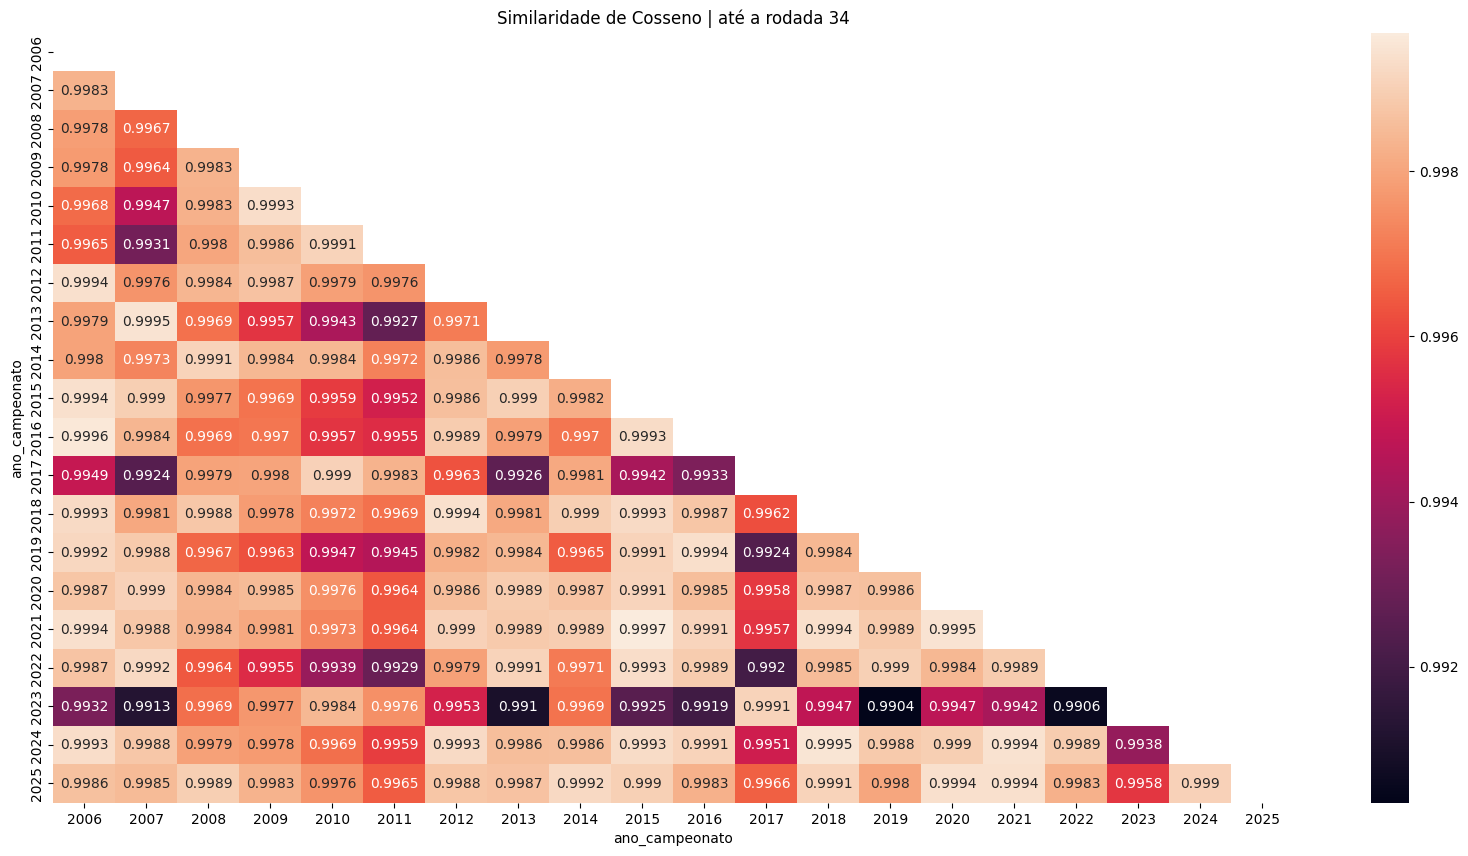

<Figure size 2000x700 with 0 Axes>

In [39]:
ano_analisado = 2025
ate_a_rodada = 34

df_cos_sim = df_pos1.loc[df_pos1.rodada <= ate_a_rodada].set_index('rodada', drop = True).T

# Calculando a similaridade do cosseno
cos_sim = cosine_similarity(df_cos_sim)
# display(cos_sim)

# Extraindo a similaridade da coluna 2009 com as outras colunas
similarity_actual_year = cos_sim[-1, :-1]
# display(similarity_actual_year)

# Criando um dataframe para visualizar os resultados
similarity_df = pd.DataFrame(cos_sim, index = df_pos1.columns[1:],columns = df_pos1.columns[1:])

display(similarity_df)

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(similarity_df)
# using the upper triangle matrix as mask 
plt.figure(figsize = (20,10))
plt.title(f'Similaridade de Cosseno | até a rodada {ate_a_rodada}')
sns.heatmap(similarity_df, annot=True, fmt='.4g', mask = matrix);

maior_similaridade_ano_analisado = similarity_df[ano_analisado].reset_index()
maior_similaridade_ano_analisado = maior_similaridade_ano_analisado.loc[maior_similaridade_ano_analisado.ano_campeonato != ano_analisado]
maior_similaridade_ano_analisado = maior_similaridade_ano_analisado.sort_values(ano_analisado, ascending = False).reset_index(drop = True)
display(maior_similaridade_ano_analisado)

# Obtendo o índice do valor máximo
max_cos_sim = maior_similaridade_ano_analisado[ano_analisado][0]
ano_max_cos_sim = maior_similaridade_ano_analisado['ano_campeonato'][0]

print(f'A maior similaridade com o ano {ano_analisado} é o ano: {ano_max_cos_sim}')
print(f'A similaridade entre o ano {ano_analisado} e o ano {ano_max_cos_sim} foi: {max_cos_sim}')

print(f'Já que o ano com maior similaridade foi o ano {ano_max_cos_sim}, qual time em 2024 possui maior similaridade com a curva da pos.1 de 2018?')

plt.figure(figsize = (20,7))
fig = px.line(df_pos1, x ='rodada', y = [int(ano_max_cos_sim), int(ano_analisado)], title = f'Brasileirão | Ano analisado: {ano_analisado} | Curva pos.1 com maior similaridade de cosseno: {ano_max_cos_sim}')
fig.add_vline(x=19, line_width=3, line_dash="dash", line_color="green")



## Similaridade de cada time do ano 2025 com a curva pos.1 mais correlacionada nos anos anteriores (2021)| Por Cosseno

time,Atlético-MG,Botafogo,Ceará SC,Corinthians,Cruzeiro,EC Bahia,EC Vitória,Flamengo,Fluminense,Fortaleza,Grêmio,Internacional,Juventude,Mirassol,Palmeiras,RB Bragantino,Santos,Sport Recife,São Paulo,Vasco da Gama,2021
rodada,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,1.0,1.0,3.0,1.0,0.0,1.0,0.0,3.0,3.0,1.0,3.0,0.0,1.0,1.0,0.0,1.0,1.0,3.0,3.0
2,1.0,4.0,4.0,4.0,3.0,2.0,0.0,4.0,3.0,4.0,3.0,4.0,3.0,1.0,4.0,1.0,1.0,1.0,2.0,3.0,6.0
3,2.0,4.0,4.0,4.0,4.0,3.0,1.0,7.0,6.0,5.0,3.0,5.0,6.0,2.0,7.0,4.0,1.0,1.0,3.0,6.0,9.0
4,2.0,5.0,7.0,4.0,7.0,3.0,4.0,10.0,9.0,5.0,3.0,5.0,6.0,5.0,10.0,7.0,4.0,1.0,4.0,6.0,10.0
5,5.0,5.0,7.0,7.0,7.0,6.0,5.0,11.0,10.0,5.0,4.0,6.0,7.0,6.0,13.0,10.0,4.0,1.0,7.0,7.0,13.0
6,6.0,8.0,8.0,7.0,10.0,9.0,6.0,14.0,10.0,6.0,5.0,9.0,7.0,7.0,13.0,13.0,4.0,2.0,8.0,7.0,14.0
7,9.0,8.0,11.0,10.0,13.0,12.0,6.0,14.0,13.0,7.0,8.0,9.0,7.0,7.0,16.0,16.0,4.0,2.0,9.0,7.0,17.0
8,12.0,11.0,12.0,10.0,16.0,12.0,9.0,17.0,13.0,10.0,9.0,9.0,7.0,10.0,19.0,17.0,5.0,2.0,9.0,7.0,18.0
9,13.0,12.0,15.0,13.0,17.0,15.0,9.0,18.0,14.0,10.0,9.0,10.0,8.0,11.0,22.0,17.0,5.0,2.0,12.0,10.0,21.0


time,Atlético-MG,Botafogo,Ceará SC,Corinthians,Cruzeiro,EC Bahia,EC Vitória,Flamengo,Fluminense,Fortaleza,Grêmio,Internacional,Juventude,Mirassol,Palmeiras,RB Bragantino,Santos,Sport Recife,São Paulo,Vasco da Gama,2021
rodada,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,1.0,1.0,3.0,1.0,0.0,1.0,0.0,3.0,3.0,1.0,3.0,0.0,1.0,1.0,0.0,1.0,1.0,3.0,3.0
2,1.0,4.0,4.0,4.0,3.0,2.0,0.0,4.0,3.0,4.0,3.0,4.0,3.0,1.0,4.0,1.0,1.0,1.0,2.0,3.0,6.0
3,2.0,4.0,4.0,4.0,4.0,3.0,1.0,7.0,6.0,5.0,3.0,5.0,6.0,2.0,7.0,4.0,1.0,1.0,3.0,6.0,9.0
4,2.0,5.0,7.0,4.0,7.0,3.0,4.0,10.0,9.0,5.0,3.0,5.0,6.0,5.0,10.0,7.0,4.0,1.0,4.0,6.0,10.0
5,5.0,5.0,7.0,7.0,7.0,6.0,5.0,11.0,10.0,5.0,4.0,6.0,7.0,6.0,13.0,10.0,4.0,1.0,7.0,7.0,13.0
6,6.0,8.0,8.0,7.0,10.0,9.0,6.0,14.0,10.0,6.0,5.0,9.0,7.0,7.0,13.0,13.0,4.0,2.0,8.0,7.0,14.0
7,9.0,8.0,11.0,10.0,13.0,12.0,6.0,14.0,13.0,7.0,8.0,9.0,7.0,7.0,16.0,16.0,4.0,2.0,9.0,7.0,17.0
8,12.0,11.0,12.0,10.0,16.0,12.0,9.0,17.0,13.0,10.0,9.0,9.0,7.0,10.0,19.0,17.0,5.0,2.0,9.0,7.0,18.0
9,13.0,12.0,15.0,13.0,17.0,15.0,9.0,18.0,14.0,10.0,9.0,10.0,8.0,11.0,22.0,17.0,5.0,2.0,12.0,10.0,21.0


'Em 2025, até a rodada 34, os times com maiores similaridades com a curva pos.1 do ano 2021 são os times:'

,time,2021
0,2021,1.000000
1,Flamengo,0.999389
2,Palmeiras,0.999020


,time,2021
0,2021,1.000000
1,Flamengo,0.999389
2,Palmeiras,0.999020
3,Cruzeiro,0.998933
4,Botafogo,0.998619
5,Ceará SC,0.998546
6,EC Bahia,0.998177
7,Internacional,0.998091
8,Corinthians,0.997944
9,Fluminense,0.997836


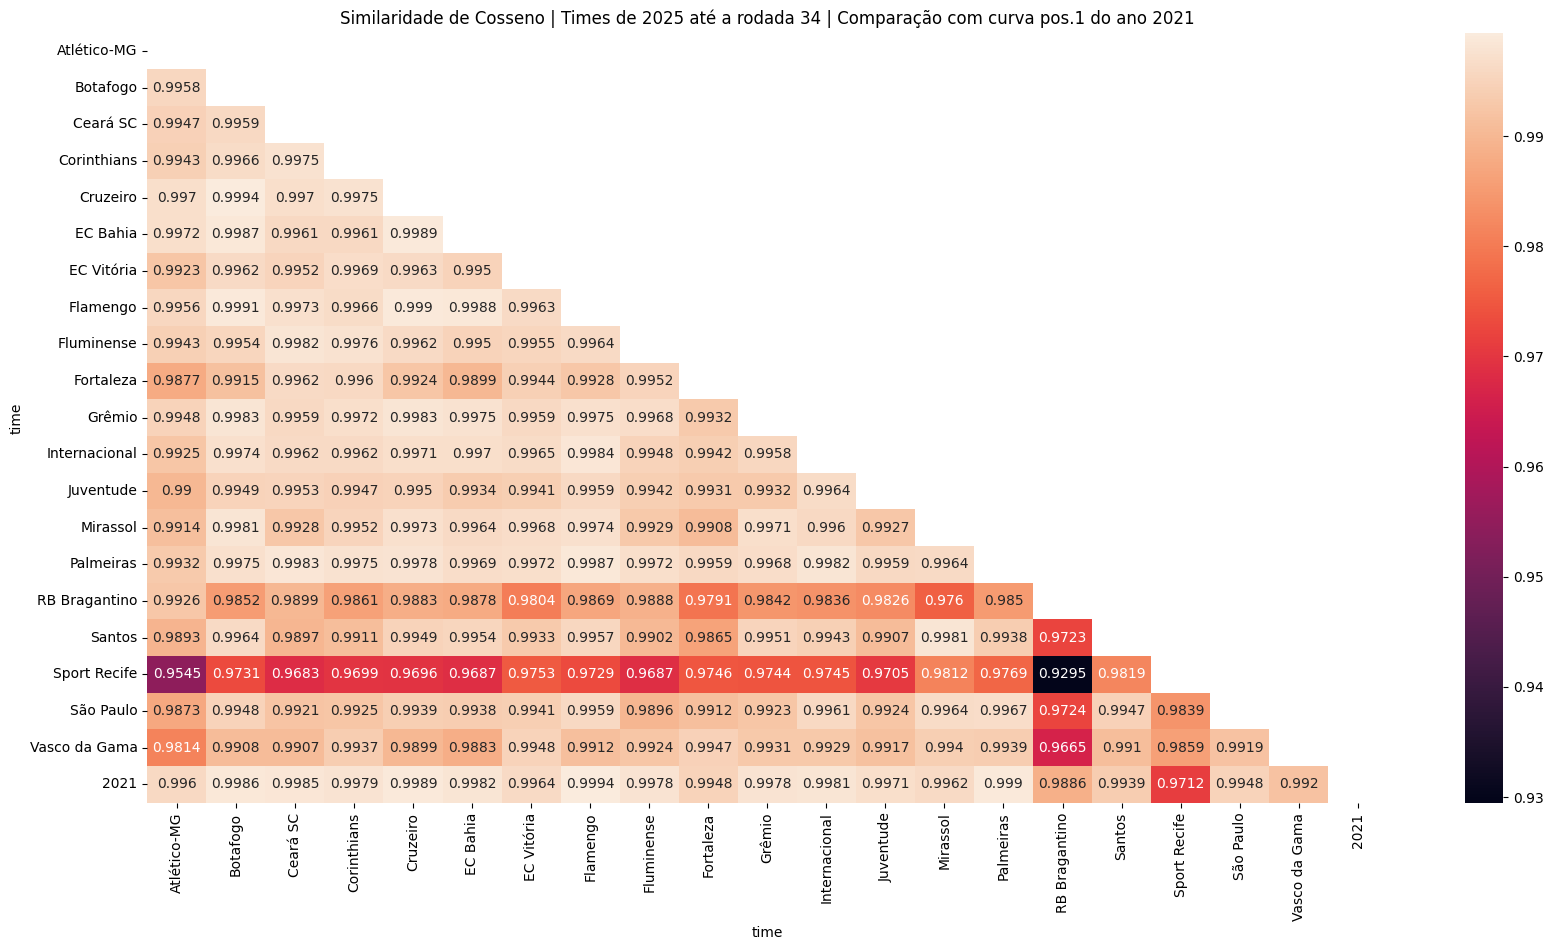

<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

In [57]:
# Análise dos times do ano selecionado em comparação ao ano com maior similaridade
df_times_ano_analisado = df_completo.loc[(df_completo.ano_campeonato == ano_analisado) & (df_completo.rodada <= ate_a_rodada)][['time', 'rodada','pontos_acum']]

df_times_ano_analisado = df_times_ano_analisado.pivot(index = 'rodada', columns = 'time', values = 'pontos_acum').reset_index()

#adicionando a coluna do ano com maior similaridade
df_times_ano_analisado[ano_max_cos_sim] = df_pos1[ano_max_cos_sim]

#filtrando o dataframe até a rodada selecionada
df_times_ano_analisado = df_times_ano_analisado.loc[df_times_ano_analisado.rodada <= ate_a_rodada]
df_times_ano_analisado.set_index('rodada', inplace = True)
df_times_ano_analisado.dropna(inplace = True)
display(df_times_ano_analisado)


df_times_ano_analisado.dropna(inplace = True)
display(df_times_ano_analisado)

###########################################################################################################################################

#analisando similaridade de cosseno de cada time do ano escolhido com a curva pos.1 do ano com maior similaridade com o ano escolhido

# Calculando a similaridade do cosseno
cos_sim_times = cosine_similarity(df_times_ano_analisado.T)
# display(df_times_ano_analisado.T)
# display(cos_sim_times)

# Criando um dataframe para visualizar os resultados
similarity_df_times = pd.DataFrame(cos_sim_times, index = df_times_ano_analisado.columns,columns = df_times_ano_analisado.columns)

# display(similarity_df_times)

#########################################################################################################################################
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(similarity_df_times)
# using the upper triangle matrix as mask 
plt.figure(figsize = (20,10))
plt.title(f'Similaridade de Cosseno | Times de {ano_analisado} até a rodada {ate_a_rodada} | Comparação com curva pos.1 do ano {ano_max_cos_sim}')
sns.heatmap(similarity_df_times, annot=True, fmt='.4g', mask = matrix);

maior_similaridade_time = similarity_df_times[ano_max_cos_sim].reset_index()
maior_similaridade_time = maior_similaridade_time.loc[maior_similaridade_time[ano_max_cos_sim] < 1]

maior_similaridade_time = maior_similaridade_time.sort_values(ano_max_cos_sim, ascending = False).reset_index(drop = True)

display(f'Em {ano_analisado}, até a rodada {ate_a_rodada}, os times com maiores similaridades com a curva pos.1 do ano {ano_max_cos_sim} são os times:', maior_similaridade_time.head(3))

#######################################
#Plot
plt.figure(figsize = (20,7))
fig = px.line(df_times_ano_analisado)#, x =df_times_ano_analisado.index+1, y = df_times_ano_analisado.columns, title = f'Brasileirão 2006 - 2024 | Pontos do 1o. colocado a cada rodada')
fig.add_vline(x=19, line_width=3, line_dash="dash", line_color="green")
fig.show()
display(maior_similaridade_time)
#######################################
#Plot Top 3 mais similares com a curva pos#1 do ano referencia
list_top_4_similaridade = maior_similaridade_time['time'][:4].tolist()
# list_top_4_similaridade.insert(0,ano_max_cos_sim)

plt.figure(figsize = (20,7))
fig = px.line(df_times_ano_analisado[list_top_4_similaridade], 
              title = f'Curva pos#1 de {ano_analisado} possui maior similaridade de cosseno com a curva de {ano_max_cos_sim} <br><sup>Top 3 times de {ano_analisado} com maior similaridade de cosseno com a curva pos#1 de {ano_max_cos_sim}</sup>')
fig.add_vline(x=19, line_width=3, line_dash="dash", line_color="green")
fig.show()


# Similaridade por menor RMSE

## Similaridade da Curva da pos #1 de 2025 (até a rodada atual) vs as curvas da pos #1 dos anos anteriores | Por RMSE

In [58]:
df_pos1_ate_rodada_atual = df_pos1.loc[df_pos1.rodada <= ate_a_rodada].set_index('rodada', drop = True)
list_cols = df_pos1_ate_rodada_atual.columns.tolist()
list_rmse = []
for col in list_cols:
    rmse_col = rmse(df_pos1_ate_rodada_atual[ano_analisado], df_pos1_ate_rodada_atual[col])
    list_rmse.append(rmse_col)

df_rmse_sim = pd.DataFrame({'ano_campeonato':list_cols, f'rmse_{ano_analisado}':list_rmse})
df_rmse_sim = df_rmse_sim.sort_values(df_rmse_sim.columns[-1]).reset_index(drop = True)
display(df_rmse_sim)

#ano com maior similaridade por RMSE com o ano analisado
ano_min_rmse_sim = df_rmse_sim.ano_campeonato.iloc[1]
#######################################

plt.figure(figsize = (20,7))
fig = px.line(df_pos1, x ='rodada', y = [int(ano_max_cos_sim), int(ano_analisado)], title = f'Brasileirão | Ano analisado: {ano_analisado} | Curva pos.1 com maior similaridade RMSE: {ano_min_rmse_sim}')
fig.add_vline(x=19, line_width=3, line_dash="dash", line_color="green")


,ano_campeonato,rmse_2025
0,2025,0.000000
1,2021,1.644957
2,2015,2.142017
3,2012,2.236068
4,2014,2.561020
5,2013,2.629024
6,2007,2.900304
7,2022,3.072650
8,2018,3.464102
9,2024,3.514675


<Figure size 2000x700 with 0 Axes>

## Similaridade de cada time do ano 2025 com a curva pos.1 mais correlacionada nos anos anteriores (2021) | Por RMSE

In [61]:
# Análise dos times do ano selecionado em comparação ao ano com maior similaridade
df_times_ano_analisado = df_completo.loc[(df_completo.ano_campeonato == ano_analisado) & (df_completo.rodada <= ate_a_rodada)][['time', 'rodada','pontos_acum']]

df_times_ano_analisado = df_times_ano_analisado.pivot(index = 'rodada', columns = 'time', values = 'pontos_acum').reset_index()

#adicionando a coluna do ano com maior similaridade
df_times_ano_analisado[ano_min_rmse_sim] = df_pos1[ano_min_rmse_sim]

#filtrando o dataframe até a rodada selecionada
df_times_ano_analisado = df_times_ano_analisado.loc[df_times_ano_analisado.rodada <= ate_a_rodada]
df_times_ano_analisado.set_index('rodada', inplace = True)
df_times_ano_analisado.dropna(inplace = True)
display(df_times_ano_analisado)

###########################################################################################################################################

#calculando o RMSE de cada time do ano escolhido com a curva pos.1 do ano com maior similaridade com o ano escolhido

# Calculando o RMSE
list_cols = df_times_ano_analisado.columns.tolist()
list_rmse = []

for time in list_cols:
    rmse_col = rmse(df_times_ano_analisado[time], df_times_ano_analisado[ano_min_rmse_sim])
    list_rmse.append(rmse_col)

df_times_rmse_sim = pd.DataFrame({'time':list_cols, f'rmse_{int(ano_analisado)}_{int(ano_min_rmse_sim)}':list_rmse})
df_times_rmse_sim = df_times_rmse_sim.sort_values(df_times_rmse_sim.columns[-1]).reset_index(drop = True)
display(df_times_rmse_sim.iloc[1:4,:])

plt.figure(figsize = (20,7))
fig = px.line(df_times_ano_analisado, 
              title = f'Curva pos#1 de {ano_analisado} possui maior similaridade por RMSE com a curva de {ano_max_cos_sim} <br><sup>Comparação dos times de {ano_analisado} com a curva pos#1 de {ano_max_cos_sim}</sup>')
fig.add_vline(x=19, line_width=3, line_dash="dash", line_color="green")
fig.show()
#######################################
#Plot top 4 mais similares com a curva pos#1 do ano referencia
list_top_4_similaridade = df_times_rmse_sim['time'][:5].tolist()

plt.figure(figsize = (20,7))
fig = px.line(df_times_ano_analisado[list_top_4_similaridade], 
              title = f'Curva pos#1 de {ano_analisado} possui maior similaridade por RMSE com a curva de {ano_max_cos_sim} <br><sup>Top 4 times de {ano_analisado} com maior similaridade de cosseno com a curva pos#1 de {ano_max_cos_sim}</sup>')
fig.add_vline(x=19, line_width=3, line_dash="dash", line_color="green")
fig.update_xaxes(ticktext=np.arange(1,33))
fig.show()

time,Atlético-MG,Botafogo,Ceará SC,Corinthians,Cruzeiro,EC Bahia,EC Vitória,Flamengo,Fluminense,Fortaleza,Grêmio,Internacional,Juventude,Mirassol,Palmeiras,RB Bragantino,Santos,Sport Recife,São Paulo,Vasco da Gama,2021
rodada,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,1.0,1.0,3.0,1.0,0.0,1.0,0.0,3.0,3.0,1.0,3.0,0.0,1.0,1.0,0.0,1.0,1.0,3.0,3.0
2,1.0,4.0,4.0,4.0,3.0,2.0,0.0,4.0,3.0,4.0,3.0,4.0,3.0,1.0,4.0,1.0,1.0,1.0,2.0,3.0,6.0
3,2.0,4.0,4.0,4.0,4.0,3.0,1.0,7.0,6.0,5.0,3.0,5.0,6.0,2.0,7.0,4.0,1.0,1.0,3.0,6.0,9.0
4,2.0,5.0,7.0,4.0,7.0,3.0,4.0,10.0,9.0,5.0,3.0,5.0,6.0,5.0,10.0,7.0,4.0,1.0,4.0,6.0,10.0
5,5.0,5.0,7.0,7.0,7.0,6.0,5.0,11.0,10.0,5.0,4.0,6.0,7.0,6.0,13.0,10.0,4.0,1.0,7.0,7.0,13.0
6,6.0,8.0,8.0,7.0,10.0,9.0,6.0,14.0,10.0,6.0,5.0,9.0,7.0,7.0,13.0,13.0,4.0,2.0,8.0,7.0,14.0
7,9.0,8.0,11.0,10.0,13.0,12.0,6.0,14.0,13.0,7.0,8.0,9.0,7.0,7.0,16.0,16.0,4.0,2.0,9.0,7.0,17.0
8,12.0,11.0,12.0,10.0,16.0,12.0,9.0,17.0,13.0,10.0,9.0,9.0,7.0,10.0,19.0,17.0,5.0,2.0,9.0,7.0,18.0
9,13.0,12.0,15.0,13.0,17.0,15.0,9.0,18.0,14.0,10.0,9.0,10.0,8.0,11.0,22.0,17.0,5.0,2.0,12.0,10.0,21.0


,time,rmse_2025_2021
1,Flamengo,1.566699
2,Palmeiras,3.104249
3,Cruzeiro,5.351296


<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

# Similaridade por menor RMSE | Turno 2: Peso 3

## Similaridade da Curva da pos #1 de 2025 (até a rodada atual) vs as curvas da pos #1 dos anos anteriores | Por RMSE | Turno 1: Peso 1, Turno 2: Peso 3

In [62]:
def identificar_curva_pos1_menor_rmse(ano_analisado: int, ate_a_rodada: int):
    '''
    Função para identificar o ano cuja curva da posição #1 de cada rodada apresenta maior similaridade com a curva do ano + rodada escolhidos

    ARGS
    ano_analisado: ano em estudo para realizar a projeção
    ate_a_rodada: ou a última rodada realizada ou rodada anteriores para avaliar o algoritmo
    '''

    df_pos1_ate_rodada_atual = df_pos1.loc[df_pos1.rodada <= ate_a_rodada]
    df_pos1_ate_rodada_atual.index.name = None
    df_pos1_ate_rodada_atual.columns.name = None
    list_cols = df_pos1_ate_rodada_atual.columns.tolist()
    # display(df_pos1_ate_rodada_atual)

    if ate_a_rodada <= 19:
        list_rmse = []
        for col in list_cols:
            rmse_col = rmse(df_pos1_ate_rodada_atual[ano_analisado], df_pos1_ate_rodada_atual[col])
            list_rmse.append(rmse_col)

    else: #rodada > 19
        df_turno1 = df_pos1_ate_rodada_atual.loc[df_pos1_ate_rodada_atual.rodada <= 19]
        df_turno2 = df_pos1_ate_rodada_atual.loc[df_pos1_ate_rodada_atual.rodada > 19]

        list_rmse = []
        for col in list_cols:
            rmse_col_t1 = rmse(df_turno1[ano_analisado], df_turno1[col])
            rmse_col_t2 = rmse(df_turno2[ano_analisado], df_turno2[col])
            rmse_col = (rmse_col_t1 + (3*rmse_col_t2))/4
            list_rmse.append(rmse_col)

    df_rmse_sim = pd.DataFrame({'ano_campeonato':list_cols, f'rmse_{ano_analisado}':list_rmse})
    df_rmse_sim = df_rmse_sim.sort_values(df_rmse_sim.columns[-1]).reset_index(drop = True)
    # display(df_rmse_sim)

    #ano com maior similaridade por RMSE com o ano analisado
    ano_min_rmse_sim = df_rmse_sim.ano_campeonato.iloc[1]
    min_rmse = df_rmse_sim.iloc[1,1]
    print(f'{"#"*50}\nANO: {ano_analisado} | RODADA: {ate_a_rodada} | Maior Similaridade com pos#1 de {ano_min_rmse_sim}\n{"#"*50}')
    #######################################

    plt.figure(figsize = (20,7))
    fig = px.line(df_pos1_ate_rodada_atual, x ='rodada', y = [int(ano_min_rmse_sim), int(ano_analisado)], title = f'Brasileirão | Ano analisado: {ano_analisado} | Até a rodada: {ate_a_rodada} | Turno 2: Peso 3 | Curva pos.1 com maior similaridade por RMSE: Ano {ano_min_rmse_sim} | RMSE {min_rmse}')
    fig.add_vline(x=19, line_width=3, line_dash="dash", line_color="green")
    fig.show();

    return ano_min_rmse_sim, min_rmse


## Similaridade de cada time do ano 2025 com a curva pos.1 mais correlacionada nos anos anteriores (2021) | Por RMSE | Turno 2: Peso 3

In [68]:
def identificar_g4_menor_rmse(ano_analisado: int, ate_a_rodada: int, ano_min_rmse_sim: int):
    '''
    Função para identificar os times g4 com menor RMSE em relação a curva pos.1 do ano mais similar ao ano escolhido

    ARGS
    ano_analisado: ano em estudo para realizar a projeção
    ate_a_rodada: ou a última rodada realizada ou rodada anteriores para avaliar o algoritmo
    ano_min_rmse_sim: ano cuja curva pos.1 apresenta maior similaridade com o ano escolhido (esta variável é a saída da função "identificar_curva_pos1_menor_rmse")
    '''

    # Análise dos times do ano selecionado em comparação ao ano com maior similaridade
    df_times_ano_analisado = df_completo.loc[(df_completo.ano_campeonato == ano_analisado) & (df_completo.rodada <= ate_a_rodada)][['time', 'rodada','pontos_acum']]
    df_times_ano_analisado = df_times_ano_analisado.pivot(index = 'rodada', columns = 'time', values = 'pontos_acum').reset_index()

    #adicionando a coluna do ano com maior similaridade
    df_pos1_ate_rodada_atual = df_pos1.loc[df_pos1.rodada <= ate_a_rodada]
    df_pos1_ate_rodada_atual.index.name = None
    df_pos1_ate_rodada_atual.columns.name = None
    # list_cols = df_pos1_ate_rodada_atual.columns.tolist()

    #filtrando o dataframe até a rodada selecionada
    df_times_ano_analisado[ano_min_rmse_sim] = df_pos1_ate_rodada_atual[ano_min_rmse_sim]
    df_times_ano_analisado.dropna(inplace = True)

    ###########################################################################################################################################

    #calculando o RMSE de cada time do ano escolhido com a curva pos.1 do ano com maior similaridade com o ano escolhido

    # Calculando o RMSE
    list_times = df_times_ano_analisado.columns.tolist()
    list_rmse = []

    if ate_a_rodada <= 19:
        for time in list_times:
            rmse_col = rmse(df_times_ano_analisado[time], df_times_ano_analisado[ano_min_rmse_sim])
            list_rmse.append(rmse_col)

    else:
        df_times_ano_analisado = df_times_ano_analisado.reset_index()
        df_turno1 = df_times_ano_analisado.loc[df_times_ano_analisado.rodada <= 19]
        df_turno2 = df_times_ano_analisado.loc[(df_times_ano_analisado.rodada > 19) & (df_times_ano_analisado.rodada <= ate_a_rodada)]
        for time in list_times:
            rmse_col_t1 = rmse(df_turno1[time], df_turno1[ano_min_rmse_sim])
            rmse_col_t2 = rmse(df_turno2[time], df_turno2[ano_min_rmse_sim])
            rmse_col = (rmse_col_t1 + (3*rmse_col_t2))/4
            list_rmse.append(rmse_col)
            # print(time, rmse_col_t1, rmse_col_t2, rmse_col)

    df_times_rmse_sim = pd.DataFrame({'time':list_times, f'rmse_{int(ano_analisado)}_{int(ano_min_rmse_sim)}':list_rmse})
    df_times_rmse_sim = df_times_rmse_sim.sort_values(df_times_rmse_sim.columns[-1]).reset_index(drop = True)

    # # #######################################
    #Plot top 4 mais similares com a curva pos#1 do ano referencia
    list_top_4_similaridade = df_times_rmse_sim['time'][:5].tolist()
    display(df_times_rmse_sim.iloc[1:5, :])

    plt.figure(figsize = (20,7))
    fig = px.line(df_times_ano_analisado[list_top_4_similaridade], 
                # title = f'Top 4 times de {ano_analisado} com maior similaridade por RMSE com a curva pos.1 de {ano_min_rmse_sim}</sup>')
                title =f'Brasileirão | Ano analisado: {ano_analisado} | Até a rodada: {ate_a_rodada} | Turno 2: Peso 3<br>Top 4 times de {ano_analisado} com maior similaridade por RMSE com a curva pos.1 de {ano_min_rmse_sim}')
    fig.add_vline(x=19, line_width=3, line_dash="dash", line_color="green")
    fig.update_xaxes(ticktext=np.arange(1,33))
    fig.show()
    return



# Validação do algoritmo
* A melhor forma de avaliação de fato foi por RMSE, atribuindo Peso maior ao turno 2.
* A seguir simularemos a projeção dos top 4 a partir da rodada 20, recalculando qual é o ano cuja curva pos.1 apresenta menor RMSE com a curva do ano em análise

In [69]:
for rodada_loop in (np.arange(ate_a_rodada, ate_a_rodada)):
    ano_min_rmse_sim, min_rmse = identificar_curva_pos1_menor_rmse(ano_analisado = ano_analisado, ate_a_rodada = rodada_loop)
    identificar_g4_menor_rmse(ano_analisado = ano_analisado, ate_a_rodada = rodada_loop, ano_min_rmse_sim= ano_min_rmse_sim)

In [70]:
df_campeoes = df_classificacao38_ano.loc[(df_classificacao38_ano.classificacao_final == 1)][['ano_campeonato','time']].reset_index(drop = True)
df_campeoes

,ano_campeonato,time
0,2006,São Paulo
1,2007,São Paulo
2,2008,São Paulo
3,2009,Flamengo
4,2010,Fluminense
5,2011,Corinthians
6,2012,Fluminense
7,2013,Cruzeiro
8,2014,Cruzeiro
9,2015,Corinthians


In [67]:
ano_analisado = 2025
ate_a_rodada = 33

for ano_loop in (np.arange(2018, 2026)):
    time_campeao_ano_loop = df_campeoes.loc[df_campeoes.ano_campeonato == ano_loop]['time'].values[0]
    print(f'{"#"*50}\nCampeão de {ano_loop}: {time_campeao_ano_loop}\n{"#"*50}')
    ano_min_rmse_sim, min_rmse = identificar_curva_pos1_menor_rmse(ano_analisado = ano_loop, ate_a_rodada = ate_a_rodada)
    identificar_g4_menor_rmse(ano_analisado = ano_loop, ate_a_rodada = ate_a_rodada, ano_min_rmse_sim = ano_min_rmse_sim)

##################################################
Campeão de 2018: Palmeiras
##################################################
##################################################
ANO: 2018 | RODADA: 33 | Maior Similaridade com pos#1 de 2024
##################################################


,time,rmse_2018_2024
1,Palmeiras,3.551991
2,Internacional,3.643462
3,Flamengo,4.129987
4,São Paulo,4.802615


##################################################
Campeão de 2019: Flamengo
##################################################
##################################################
ANO: 2019 | RODADA: 33 | Maior Similaridade com pos#1 de 2021
##################################################


,time,rmse_2019_2021
1,Palmeiras,4.041176
2,Flamengo,4.093224
3,Santos,6.547454
4,São Paulo,12.281618


##################################################
Campeão de 2020: Flamengo
##################################################
##################################################
ANO: 2020 | RODADA: 33 | Maior Similaridade com pos#1 de 2006
##################################################


,time,rmse_2020_2006
1,São Paulo,3.640589
2,Flamengo,4.218981
3,Atlético-MG,4.260745
4,Internacional,5.009795


##################################################
Campeão de 2021: Atlético-MG
##################################################
##################################################
ANO: 2021 | RODADA: 33 | Maior Similaridade com pos#1 de 2025
##################################################


,time,rmse_2021_2025
1,Atlético-MG,1.903664
2,Flamengo,8.183168
3,Palmeiras,9.290603
4,Fortaleza,13.375368


##################################################
Campeão de 2022: Palmeiras
##################################################
##################################################
ANO: 2022 | RODADA: 33 | Maior Similaridade com pos#1 de 2015
##################################################


,time,rmse_2022_2015
1,Palmeiras,1.952442
2,Internacional,9.238932
3,Corinthians,9.516171
4,Fluminense,10.551462


##################################################
Campeão de 2023: Palmeiras
##################################################
##################################################
ANO: 2023 | RODADA: 33 | Maior Similaridade com pos#1 de 2017
##################################################


,time,rmse_2023_2017
1,Botafogo,1.764825
2,Palmeiras,8.889428
3,Flamengo,9.947469
4,RB Bragantino,10.232178


##################################################
Campeão de 2024: Botafogo
##################################################
##################################################
ANO: 2024 | RODADA: 33 | Maior Similaridade com pos#1 de 2018
##################################################


,time,rmse_2024_2018
1,Botafogo,1.888109
2,Palmeiras,4.058860
3,Fortaleza,4.723449
4,Flamengo,5.211314


##################################################
Campeão de 2025: Flamengo
##################################################
##################################################
ANO: 2025 | RODADA: 33 | Maior Similaridade com pos#1 de 2021
##################################################


,time,rmse_2025_2021
1,Flamengo,1.548834
2,Palmeiras,3.104841
3,Cruzeiro,6.229636
4,Mirassol,10.965713


<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>